In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')

In [3]:
df.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False


In [4]:
df.shape

(179108, 13)

In [5]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [6]:
#combert user_name to categorical type#
df['user_name'] = df['user_name'].astype('category')
#create an unique value for every user_name#
df['user_name'] = df['user_name'].cat.codes
#change date to datetime and delete time#
df['date'] = pd.to_datetime(df['date']).dt.date
df.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,89755,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False


In [7]:
#removing urls from tweets#
import re
text = df['text']
remove_url = lambda x: re.sub(r'https\S+', '', str(x))
text_lr = text.apply(remove_url)
text_lr.head(1)

0    If I smelled the scent of hand sanitizers toda...
Name: text, dtype: object

In [8]:
#combert all tweets to lower case#
to_lower = lambda x: x.lower()
text_lr_lc = text_lr.apply(to_lower)
text_lr_lc.head(2)

0    if i smelled the scent of hand sanitizers toda...
1    hey @yankees @yankeespr and @mlb - wouldn't it...
Name: text, dtype: object

In [9]:
#remove punctuation# 
import string
remove_puncs = lambda x: x.translate(str.maketrans('','', string.punctuation)) #metod that create a translation table
# but we dont want to replace nothing so we leave empty and apply string.punctuation to remove puntantion
text_lr_lc_rp = text_lr_lc.apply(remove_puncs)
text_lr_lc_rp.head(1)


0    if i smelled the scent of hand sanitizers toda...
Name: text, dtype: object

In [10]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [11]:
#removing stopwords(words that are frecuenly and unusfull for our analysis#
more_words = ['covid', '#coronavirus', 'coronaviruspandemic', '#covid19', 'covid19']
stop_words = set(stopwords.words('english')) #common words in english#
stop_words.update(more_words)
print(stop_words)

remove_words = lambda x: ' '.join([word for word in x.split() if word not in stop_words])
text_lr_lc_rp_ns = text_lr_lc_rp.apply(remove_words)
text_lr_lc_rp_ns.head(1)

{'d', 'the', "mightn't", 'by', 'against', "weren't", 'haven', 'mustn', 'yourself', 'why', 'when', 'to', 'own', 'its', 'while', "mustn't", 'ma', 'have', 'into', "wouldn't", 'ours', "won't", 'has', 'yourselves', 'doesn', 'wasn', "you've", 'does', 'where', 'covid', 'am', 'he', 'that', 'coronaviruspandemic', 'up', 'did', "needn't", 'through', "couldn't", 'him', 'should', 'it', 'will', 'which', 'at', "wasn't", 'doing', 'needn', 'won', 'here', "shouldn't", 'an', 'above', "you'll", 'of', 'or', 'than', 'again', 'we', 'a', 'just', 'yours', 'with', 'below', 'herself', 'but', 'had', 'very', 's', 'her', 'm', 'itself', 'during', 'such', "that'll", 'shouldn', "didn't", 'having', 'and', 'same', 'me', 'out', 'hadn', 'll', 'theirs', 'myself', 'shan', 'themselves', 'is', 'no', 'under', "you'd", 'you', 'be', 'any', "hasn't", 'between', 'over', 'o', 'ain', 'down', 'don', 'do', "haven't", 'who', 'i', 'some', 'my', "doesn't", 'isn', 'this', 'off', 'hasn', 'whom', 'only', 'those', 'because', 'after', 'now', 

0    smelled scent hand sanitizers today someone pa...
Name: text, dtype: object

In [12]:
#create a list of words out of all the tweets#
words_list = [word for line in text_lr_lc_rp_ns for word in line.split()] #first look in lines second look in words#
words_list[:5]

['smelled', 'scent', 'hand', 'sanitizers', 'today']

In [13]:
#count most common words#
import collections
word_counts = collections.Counter(words_list).most_common(10)
print(word_counts)
#combert into a data frame#
word_df = pd.DataFrame(word_counts)
word_df.columns = ['word', 'frq']
print(word_df)

[('cases', 18596), ('new', 14683), ('coronavirus', 14176), ('amp', 11907), ('people', 9053), ('pandemic', 7869), ('deaths', 7429), ('us', 7245), ('health', 5188), ('one', 4825)]
          word    frq
0        cases  18596
1          new  14683
2  coronavirus  14176
3          amp  11907
4       people   9053
5     pandemic   7869
6       deaths   7429
7           us   7245
8       health   5188
9          one   4825


In [14]:
from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
#import plotly.express as px

sns.set(style="darkgrid")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

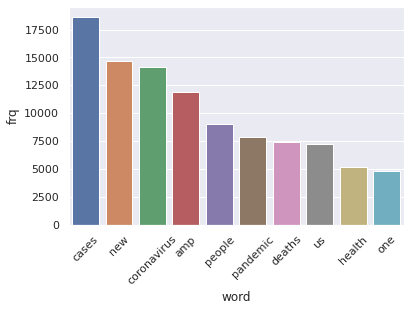

In [15]:
sns.barplot(data = word_df, x = 'word', y = 'frq')
plt.xticks(rotation = 45)
#add tittle and delete covid19 of words#

In [16]:
#add the clead text to our df#
df['text'] = text_lr_lc_rp_ns
df.head(2)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,89755,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25,smelled scent hand sanitizers today someone pa...,NaN,Twitter for iPhone,False
1,76403,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,NaN,Twitter for Android,False


               user_name  user_location  ...  source  is_retweet
user_verified                            ...                    
False             156013         121146  ...  155936      156013
True               23095          21191  ...   23095       23095

[2 rows x 12 columns]


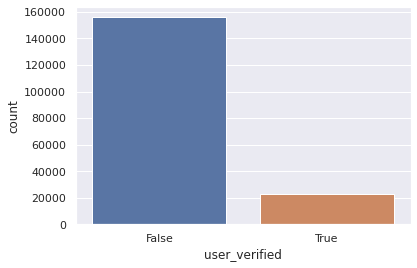

In [17]:
sns.countplot(data = df, x = 'user_verified')

print(df.groupby('user_verified').count())

In [18]:
sid = SentimentIntensityAnalyzer()
ps = lambda x: sid.polarity_scores(x)
sentiment_score = df['text'].apply(ps)
sentiment_score

0         {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1         {'neg': 0.11, 'neu': 0.709, 'pos': 0.181, 'com...
2         {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
3         {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4         {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
179104    {'neg': 0.435, 'neu': 0.235, 'pos': 0.329, 'co...
179105    {'neg': 0.25, 'neu': 0.556, 'pos': 0.194, 'com...
179106    {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
179107    {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [19]:
sentiment_df = pd.DataFrame(data = list(sentiment_score))
sentiment_df.head()

,neg,neu,pos,compound
0,0.00,0.758,0.242,0.4939
1,0.11,0.709,0.181,0.2263
2,0.00,0.832,0.168,0.2057
3,0.00,0.563,0.437,0.7351
4,0.00,0.796,0.204,0.3182


In [20]:
labelize = lambda x: 'neutral' if x == 0 else('positive' if x > 0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head(10)

,neg,neu,pos,compound,label
0,0.000,0.758,0.242,0.4939,positive
1,0.110,0.709,0.181,0.2263,positive
2,0.000,0.832,0.168,0.2057,positive
3,0.000,0.563,0.437,0.7351,positive
4,0.000,0.796,0.204,0.3182,positive
5,0.263,0.737,0.000,-0.4951,negative
6,0.000,1.000,0.000,0.0000,neutral
7,0.000,1.000,0.000,0.0000,neutral
8,0.000,0.426,0.574,0.6597,positive
9,0.000,0.792,0.208,0.2732,positive


In [21]:
data = df.join(sentiment_df.label)
data.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,label
0,89755,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25,smelled scent hand sanitizers today someone pa...,NaN,Twitter for iPhone,False,positive


      index  label
0  positive  70050
1   neutral  62520
2  negative  46538


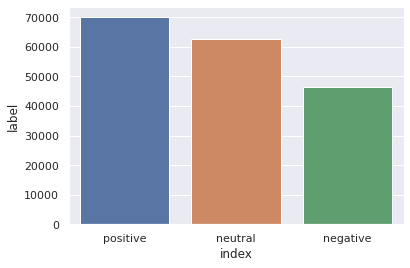

In [22]:
count_df = data['label'].value_counts().reset_index()
print(count_df)
sns.barplot(data = count_df, x = 'index', y = 'label')

         date     label  counts
0  2020-07-24  negative      84
1  2020-07-24   neutral      96
2  2020-07-24  positive     115
3  2020-07-25  negative    4326
4  2020-07-25   neutral    5798


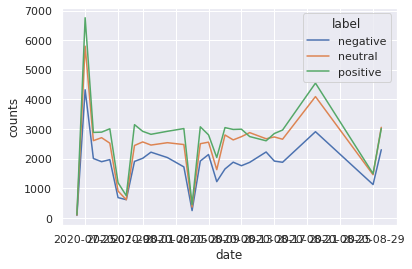

In [30]:
data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()
data_agg.columns = ['date', 'label', 'counts']
print(data_agg.head())
sns.lineplot(data = data_agg, x = 'date', y = 'counts', hue = 'label')

#px(data = data_agg, x = 'data', y = 'counts', color = 'label')

Mine

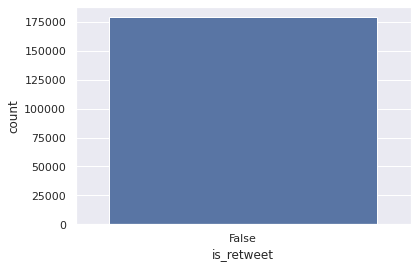

In [24]:
df.groupby('is_retweet').count()
sns.countplot(data = df, x = 'is_retweet')

In [39]:
#sort = df.groupby('source').sum()
#sort.sort_values('source', ascending = False)
#sns.countplot(data = df, x = 'source')
print(df[df['source'] == 'Twitter for iPhone'].count().reset_index())
print(df[df['source'] == 'Twitter for Android'].count().reset_index())

               index      0
0          user_name  35472
1      user_location  27743
2   user_description  33066
3       user_created  35472
4     user_followers  35472
5       user_friends  35472
6    user_favourites  35472
7      user_verified  35472
8               date  35472
9               text  35472
10          hashtags  24591
11            source  35472
12        is_retweet  35472
               index      0
0          user_name  40179
1      user_location  31033
2   user_description  37212
3       user_created  40179
4     user_followers  40179
5       user_friends  40179
6    user_favourites  40179
7      user_verified  40179
8               date  40179
9               text  40179
10          hashtags  28719
11            source  40179
12        is_retweet  40179


In [26]:
df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64